In [41]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [42]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.mnist.load_data()

In [43]:
len(X_train)

60000

In [44]:
len(X_test)

10000

In [45]:
X_train[0].shape

(28, 28)

In [46]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

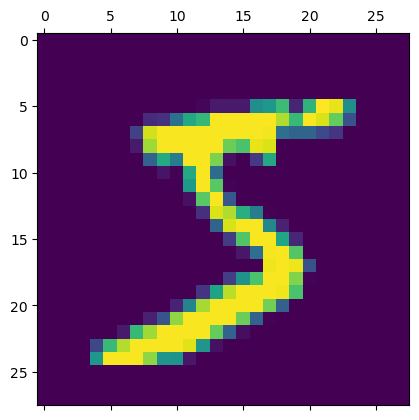

In [47]:
 plt.matshow(X_train[0])

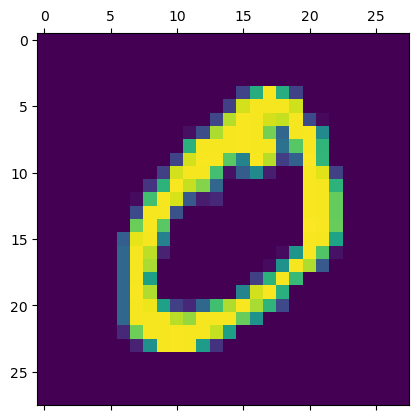

In [48]:
 plt.matshow(X_train[1])

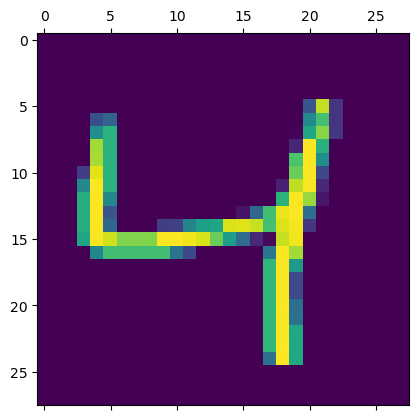

In [49]:
 plt.matshow(X_train[2])

In [50]:
y_train[2]

4

In [51]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
X_train = X_train / 255
X_test = X_test / 255

In [54]:
x_train_flattened = X_train.reshape(len(X_train),28*28)
x_test_flattened = X_test.reshape(len(X_test),28*28)

In [55]:
x_test_flattened.shape

(10000, 784)

In [56]:
x_train_flattened.shape

(60000, 784)

In [57]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [89]:
model= Sequential([
    Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 527us/step - loss: 0.4677 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 1s 545us/step - loss: 0.3036 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 1s 520us/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 514us/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 1s 517us/step - loss: 0.2668 - accuracy: 0.9255


In [90]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 503us/step - loss: 0.2696 - accuracy: 0.9250


[0.26960158348083496, 0.925000011920929]

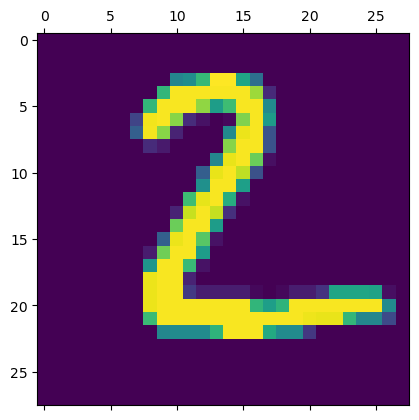

In [91]:
plt.matshow(X_test[1])

In [92]:
y_predicted= model.predict(x_test_flattened)
y_predicted [1]

313/313 [==============================] - 0s 895us/step


array([3.3388865e-01, 4.9877404e-03, 9.9850672e-01, 3.5796106e-01,
       2.9945810e-10, 7.9185432e-01, 7.8789258e-01, 5.4906351e-13,
       1.7386299e-01, 2.7517859e-09], dtype=float32)

In [93]:
np.argmax(y_predicted [1])

2

In [94]:
y_predicted_labels = [np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

### cm is a Confusion Matrix

In [95]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    4,    6,    2,    3,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   5,   13,  907,   21,    6,    4,   12,   10,   50,    4],
       [   2,    0,   13,  930,    0,   17,    2,   12,   27,    7],
       [   2,    1,    6,    1,  915,    0,    8,    4,   10,   35],
       [   9,    4,    1,   44,    9,  757,   12,    8,   42,    6],
       [  14,    3,    6,    1,    7,   12,  907,    2,    6,    0],
       [   1,   11,   19,    8,    6,    0,    0,  953,    3,   27],
       [   5,    9,    5,   19,    9,   15,    8,   13,  885,    6],
       [   9,    7,    1,   11,   26,    5,    0,   24,   10,  916]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

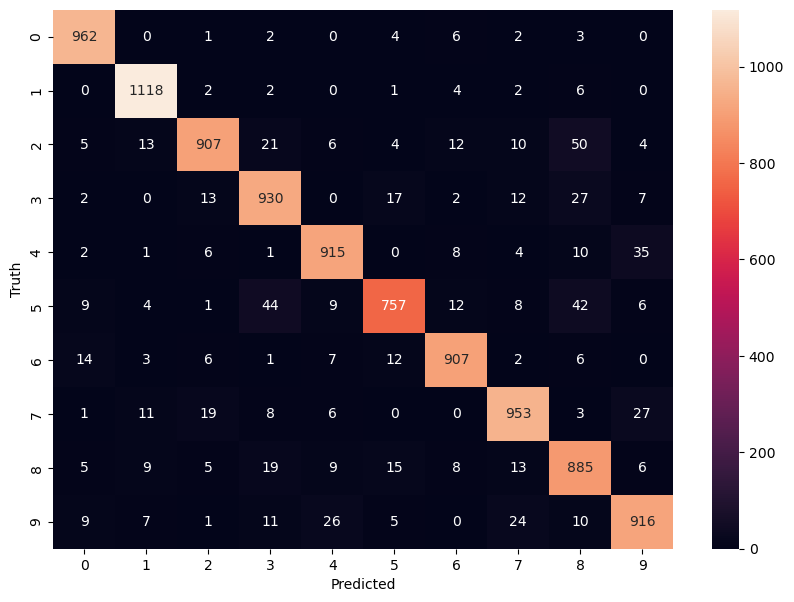

In [96]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
model= Sequential([
    Dense(100, input_shape=(784,),activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 853us/step - loss: 0.2709 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 2s 828us/step - loss: 0.1232 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 800us/step - loss: 0.0858 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 1s 794us/step - loss: 0.0656 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 830us/step - loss: 0.0506 - accuracy: 0.9840


In [98]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 578us/step - loss: 0.0762 - accuracy: 0.9776


[0.07615379244089127, 0.9775999784469604]

313/313 [==============================] - 0s 531us/step


Text(95.72222222222221, 0.5, 'Truth')

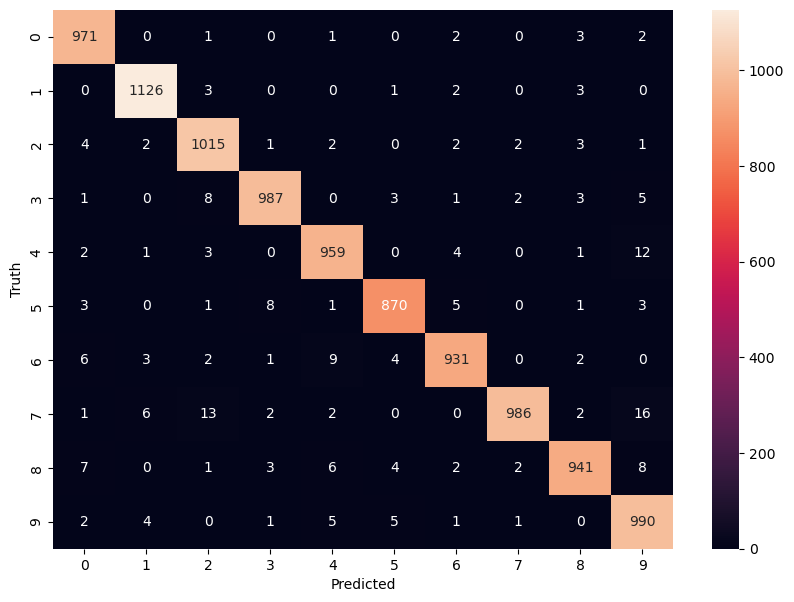

In [99]:
y_predicted= model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i)for i in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### It's just the same as above but in this we directly run the model without flattening it.

In [109]:
model= Sequential([
    Flatten(input_shape= (28,28)),
    Dense(100, input_shape=(784,),activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train, epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2752 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.1235 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.0873 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.0677 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.0536 - accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.0421 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0342 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.0292 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.0252 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 1s 764us/